In [2]:
setwd("~/WGS/SNPS/All_mylu/genolike/admix/logs/")

In [6]:
likes=read.csv('All_Admix_loglike.csv', header=F)

In [8]:
colnames(likes)=c("kvalue", "rep", "loglike")

In [9]:
head(likes)

kvalue,rep,loglike
1,2,-2841805210
1,3,-2841805210
1,4,-2841805210
1,5,-2841805210
2,2,-2827117341
2,3,-2827401601


Delta K from evanno 2005 (jerome goudet see here:http://taylor0.biology.ucla.edu/structureHarvester/faq.html

1/ average the L(K) over the x (say 20) replicates

2/ estimate from these averages L''(K) as abs( L(K+1) - 2L(K) + L(K-1) )

3/ divide by the standard deviation of L(K) (sd of the different replicates for the same K)

In [48]:
meanlikes= do.call(data.frame, aggregate(. ~ kvalue, data = likes[-2], FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 

In [49]:
head(meanlikes)

kvalue,loglike.av,loglike.stdev
1,-2841805210,2.892899e-05
2,-2827314393,1.599424e+05
3,-2813018733,1.652031e+05
4,-2785023470,8.127826e+04
5,-2785272264,1.510921e+05
6,-2771249899,1.437648e+05


In [45]:
meanlikes$L2k=NA

In [54]:
for (k in 2:NROW(meanlikes)){
    meanlikes$Dk[k] = abs(meanlikes$loglike.av[k+1]-2*(meanlikes$loglike.av[k])+meanlikes$loglike.av[k-1])/meanlikes$loglike.stdev[k]    
    }

In [55]:
head(meanlikes)

kvalue,loglike.av,loglike.stdev,Dk
1,-2841805210,2.892899e-05,NA
2,-2827314393,1.599424e+05,1.220176
3,-2813018733,1.652031e+05,82.925802
4,-2785023470,8.127826e+04,347.498311
5,-2785272264,1.510921e+05,94.453408
6,-2771249899,1.437648e+05,3.997232


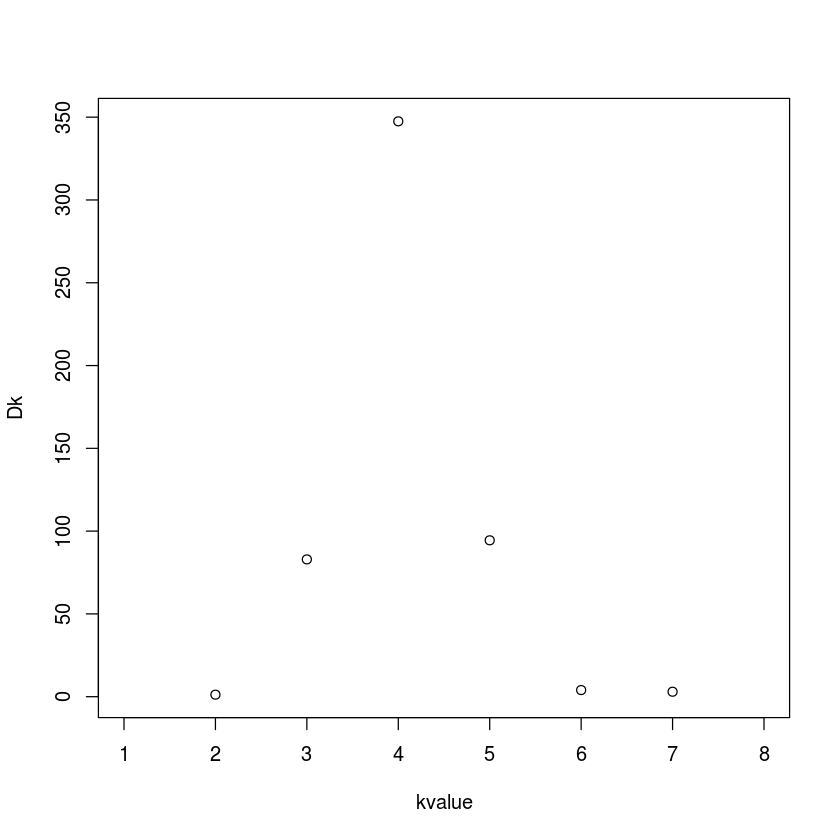

In [59]:
with(meanlikes, plot(kvalue, Dk))

thats wrong, becasue 4 of the 4s are actually 5s. But, once you fix, the highest value is most likely k value